In [1]:
import numpy as np
import matplotlib.pyplot as plt

from data_loader import CIFAR_10_DataLoader
import losses
%matplotlib inline

In [29]:
file_directory = '/Users/subhojit/Downloads/cifar-10-batches-py'
cdl = CIFAR_10_DataLoader()
xtrain_data, ytrain_data, Xtest, ytest = cdl.load_cifar_10_dataset(file_directory)

xtrain_data = xtrain_data.astype('float32') / 255.0
Xtest = Xtest.astype('float32') / 255.0

# np.random.shuffle(Xtrain)
n1 = int(0.8 * len(xtrain_data))
Xtrain = xtrain_data[:n1]
ytrain = ytrain_data[:n1]
Xdev = xtrain_data[n1:]
ydev = ytrain_data[n1:]

num_classes = len(set(ytrain))

In [34]:
# data preparation
np.random.seed(231)
std_dev = 1e-2
n_hidden = 200
W1 = np.random.randn(3072, n_hidden) * std_dev
b1 = np.zeros(n_hidden)
W2 = np.random.randn(n_hidden, num_classes) * std_dev
b2 = np.zeros(10)

parameters = [W1, b1, W2, b2]

print(sum(par.size for par in parameters))

616610


In [31]:
def softmax_loss(scores, y):
    epsilon = 1e-12
    num_examples = scores.shape[0]
    shifted_scores = scores - np.max(scores, axis=1, keepdims=True)
    exp_scores = np.exp(shifted_scores)
    probs = exp_scores / np.sum(exp_scores, axis=1, keepdims=True)
    correct_log_probs = -np.log(probs[np.arange(num_examples), y] + epsilon)
    loss = np.mean(correct_log_probs)
    return loss

def softmax_numpy(x, axis=1):
    x_shifted = x - np.max(x, axis=axis, keepdims=True)
    exp_x = np.exp(x_shifted)
    return exp_x / np.sum(exp_x, axis=axis, keepdims=True)

In [46]:
max_iterations = 10000
batch_size = 128
lossi = []

for i in range(max_iterations):

    #mini batch
    ix = np.random.randint(0, Xtrain.shape[0], (batch_size,))
    Xb, Yb = Xtrain[ix], ytrain[ix]

    #farward pass
    h1 = np.dot(Xb, W1) + b1
    scores = np.dot(h1, W2) + b2

    # backward pass
    loss = softmax_loss(scores, Yb)
    lossi.append(loss)
    dscores = softmax_numpy(scores)
    dscores[np.arange(Xb.shape[0]), Yb] -= 1
    dscores /= Xb.shape[0]

    dW2 = np.dot(h1.T, dscores)
    db2 = np.sum(dscores, axis=0)
    dh1 = np.dot(dscores, W2.T)
    dW1 = np.dot(Xb.T, dh1)
    db1 = np.sum(dh1, axis=0)

    grads = [dW1, db1, dW2, db2]
    # print(grads)
    lr = 0.01
    W1 += -lr * dW1
    b1 += -lr * db1
    W2 += -lr * dW2
    b2 += -lr * db2
    if i % 100 == 0:
        print(f"loss: {loss:.4f}")

loss: 1.5228
loss: 1.5322
loss: 1.7281
loss: 1.6781
loss: 1.6564
loss: 1.6667
loss: 1.8238
loss: 1.7642
loss: 1.6862
loss: 1.7433
loss: 1.5949
loss: 1.8468
loss: 1.7204
loss: 1.9756
loss: 1.6228
loss: 1.7262
loss: 1.6807
loss: 1.7631
loss: 1.7401
loss: 1.6137
loss: 1.6667
loss: 1.9304
loss: 1.5846
loss: 1.6396
loss: 1.6243
loss: 1.7296
loss: 1.6310
loss: 1.5574
loss: 1.7217
loss: 1.7663
loss: 1.5559
loss: 1.5145
loss: 1.8007
loss: 1.5982
loss: 1.6457
loss: 1.9249
loss: 1.6784
loss: 1.7180
loss: 1.8068
loss: 1.5980
loss: 1.6089
loss: 1.8166
loss: 1.7240
loss: 1.5326
loss: 1.7730
loss: 1.6628
loss: 1.5654
loss: 1.6904
loss: 1.8166
loss: 1.6351
loss: 1.8008
loss: 1.5842
loss: 1.6167
loss: 1.6837
loss: 1.4390
loss: 1.8355
loss: 1.6095
loss: 1.6824
loss: 1.5889
loss: 1.6510
loss: 1.7281
loss: 1.6914
loss: 1.7941
loss: 1.6119
loss: 1.5569
loss: 1.5903
loss: 1.9652
loss: 1.6841
loss: 1.5748
loss: 1.6315
loss: 1.8163
loss: 1.6627
loss: 1.7067
loss: 1.4719
loss: 1.6421
loss: 1.6217
loss: 1.5438

(array([  1.,   1.,   1.,   4.,   2.,   0.,   5.,   9.,   6.,  24.,  27.,
         23.,  31.,  37.,  38.,  53.,  46.,  68.,  60.,  87.,  82., 103.,
        109., 113.,  98., 103.,  75., 101.,  83.,  79.,  92.,  68.,  48.,
         57.,  43.,  38.,  39.,  22.,  24.,  23.,  21.,  15.,  12.,  16.,
          4.,   3.,   2.,   2.,   0.,   2.]),
 array([-2.31044964e-01, -2.21809803e-01, -2.12574642e-01, -2.03339480e-01,
        -1.94104319e-01, -1.84869158e-01, -1.75633996e-01, -1.66398835e-01,
        -1.57163674e-01, -1.47928512e-01, -1.38693351e-01, -1.29458190e-01,
        -1.20223028e-01, -1.10987867e-01, -1.01752706e-01, -9.25175443e-02,
        -8.32823830e-02, -7.40472216e-02, -6.48120603e-02, -5.55768990e-02,
        -4.63417377e-02, -3.71065763e-02, -2.78714150e-02, -1.86362537e-02,
        -9.40109235e-03, -1.65931024e-04,  9.06923030e-03,  1.83043916e-02,
         2.75395530e-02,  3.67747143e-02,  4.60098756e-02,  5.52450369e-02,
         6.44801983e-02,  7.37153596e-02,  8.29505

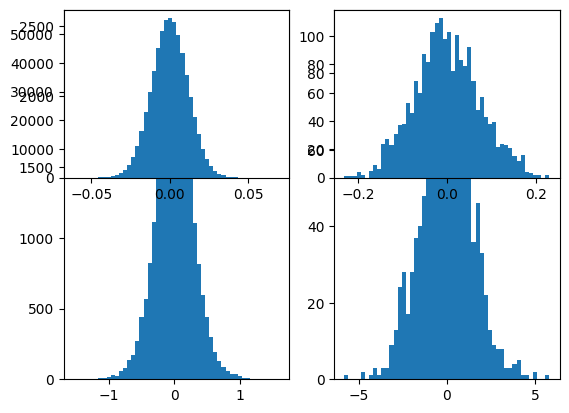

In [48]:
plt.figure()
plt.subplot(121)
plt.hist(h1.reshape(-1).tolist(), 50)
plt.subplot(122)
plt.hist(scores.reshape(-1).tolist(), 50)
plt.subplot(221)
plt.hist(W1.reshape(-1).tolist(), 50)
plt.subplot(222)
plt.hist(W2.reshape(-1).tolist(), 50)

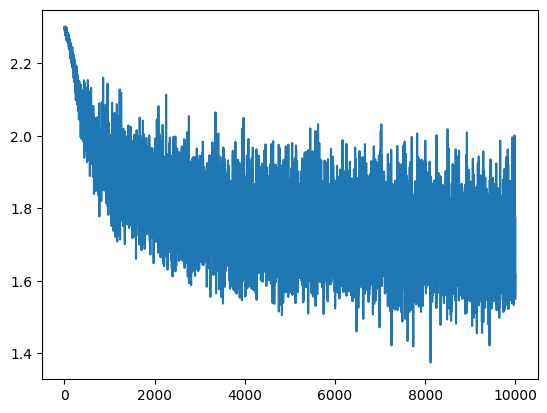

In [36]:
plt.plot(lossi)

In [37]:
def split_loss(split):
    x, y = {
        'train': (Xtrain, ytrain),
        'dev': (Xdev, ydev),
        'test': (Xtest, ytest),
    }[split]
    h1 = np.dot(x, W1) + b1
    scores = np.dot(h1, W2) + b2
    loss = softmax_loss(scores, y)
    print(f"{split} => loss: {loss:.4f}")

split_loss('train')
split_loss('dev')


train => loss: 1.6911
dev => loss: 1.7488


In [39]:
split_loss('test')

test => loss: 1.7266


In [38]:
def accuracy(x, labels):
    h1 = np.dot(x, W1) + b1
    scores = np.dot(h1, W2) + b2
    probs = softmax_numpy(scores)

    preds = np.argmax(probs, axis=1)
    return np.mean(preds == labels)

accuracy(Xtest, ytest)


np.float64(0.4023)